# Notebook acesso a API WordBank Data com Python.

*Referência:* https://wbdata.readthedocs.io/en/stable/

In [1]:
# Baixando a biblioteca de integração com a API WB Data.
!pip install wbdata --quiet

In [2]:
# Instalando as bibliotecas necessárias.
import wbdata as wb
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Definindo Máximo do Linhas e Colunas
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

## Tipos de banco de dados contidos no WB Data.

Comando **get_source()**

In [5]:
# Imprimindo bases de dados disponíveis.
wb.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

## Quais indicadores estão contidos em cada base de dados do WB Data.

Comando **get_indicator(source=$n$)** e **search_indicators()**

In [6]:
# Indicadores de WDI Database Archives (Source 57).
wb.get_indicator(source=57)

id                         name
-------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.AID.CREL.MT             Cereal food aid deliveries (FAO, tonnes)
AG.CON.FERT.MT             Fertilizer consumption (metric tons)
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.CON.PEST.MT             Pesticide consumption (metric tons)
AG.IMP.CREL.MT             Cereal imports (metric tons)
AG.LND.AGRI.HA             Agricultural land (hectares)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land

In [7]:
# Procurando Indicador Especifico. "Variação do PIB per capita".
wb.search_indicators('GDP per capita growth')

id                 name
-----------------  ------------------------------------------------
NV.AGR.PCAP.KD.ZG  Real agricultural GDP per capita growth rate (%)
NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)

## Pesquisando quais países estão disponíveis no WB Data.

Comando **search_countries()**

In [8]:
# Procurando por Países com "BRA".
wb.search_countries('BRA')

id    name
----  ---------
BRA   Brazil
GIB   Gibraltar

## Extraindo DataFrame para análise do PIB $per$ $capita$ do Brasil.

In [9]:
# Definindo países.
paises = ["BRA","USA"]

# Definindo o indicador.
indicador = {'NY.GDP.PCAP.KD.ZG':'GDP per capita growth (annual %)'}

In [10]:
# Extraindo data frame.
df = wb.get_dataframe(indicador,
                      country=paises,
                      convert_date=True)

# Pivotando data frame.
df = df.unstack(level=0)

In [11]:
# Visualizando data frame.
df.head(5)

GDP per capita growth (annual %)              
country                              Brazil United States
date                                                     
1960-01-01                              NaN           NaN
1961-01-01                         5.374304      0.618121
1962-01-01                         3.482729      4.480669
1963-01-01                        -2.315872      2.908272
1964-01-01                         0.449644      4.340549

In [12]:
# Verificando tamanho do data frame.
df.shape

(63, 2)

In [13]:
# Verificando qualidade das colunas.
df.info()

<class 'wbdata.api.WBDataFrame'>
DatetimeIndex: 63 entries, 1960-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   (GDP per capita growth (annual %), Brazil)         62 non-null     float64
 1   (GDP per capita growth (annual %), United States)  62 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [14]:
# Verificando valores nulos das colunas.
df.isna().sum().sum()

2

In [15]:
# Retirando valores nulos. (Pois são AMBOS as primeiros abservações)
df.dropna(inplace=True)

# Bonus: Análise de Séries Temporais.

In [16]:
# Baixando biblioteca necessária.
!pip install arch --quiet

In [17]:
# Instalando Bibliotecas Necessárias.
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from arch import arch_model
import numpy as np

## Análise Descritiva dos Dados

In [18]:
# Medidas resumo dos PIB's per capita.
df.describe().T

count      mean       std  \
                                 country                                    
GDP per capita growth (annual %) Brazil          62.0  2.073857  3.759694   
                                 United States   62.0  1.958866  2.117502   

                                                     min       25%       50%  \
                                 country                                       
GDP per capita growth (annual %) Brazil        -6.452871 -0.278708  2.271479   
                                 United States -3.700953  1.068371  2.014744   

                                                     75%        max  
                                 country                             
GDP per capita growth (annual %) Brazil         4.394575  11.250508  
                                 United States  3.246846   6.312168

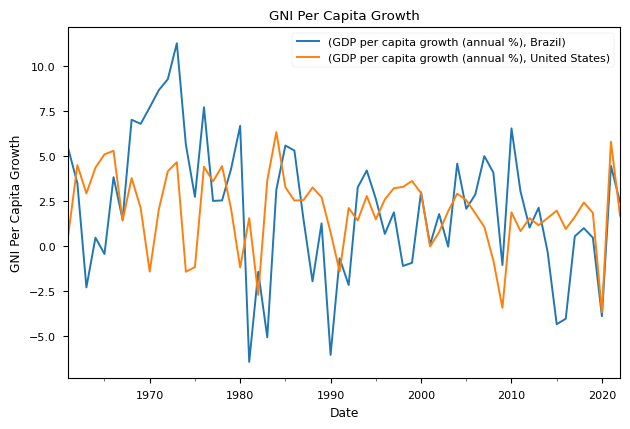

In [19]:
# Visualização gráfica das séries.
plt.style.use('seaborn-paper')
df.plot()
plt.legend(loc='best')
plt.title("GNI Per Capita Growth")
plt.xlabel('Date')
plt.ylabel('GNI Per Capita Growth')
plt.tight_layout()
plt.show()

In [20]:
# Definindo séries individuais.
brazil = pd.DataFrame(df['GDP per capita growth (annual %)']['Brazil'])
usa = pd.DataFrame(df['GDP per capita growth (annual %)']['United States'])

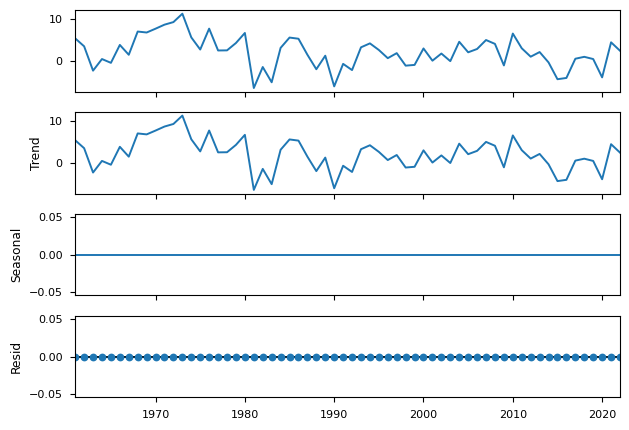

In [21]:
# Decomposição da série brasileira.
plt.style.use('seaborn-paper')
brazil_decompose = seasonal_decompose(brazil, model='additive')
brazil_decompose.plot()
plt.tight_layout()
plt.show()

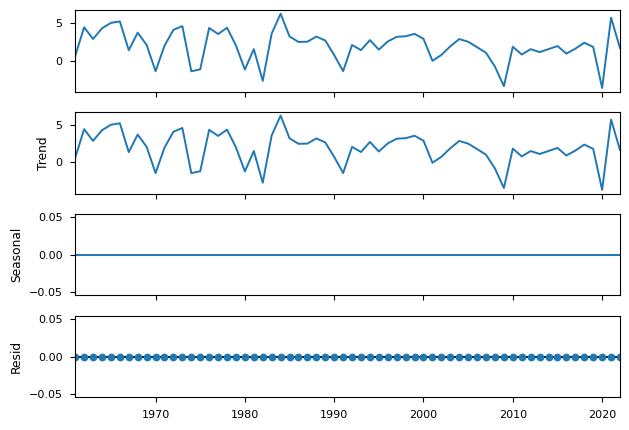

In [22]:
# Decomposição da série estadunidense.
plt.style.use('seaborn-paper')
usa_decompose = seasonal_decompose(usa, model='additive')
usa_decompose.plot()
plt.tight_layout()
plt.show()

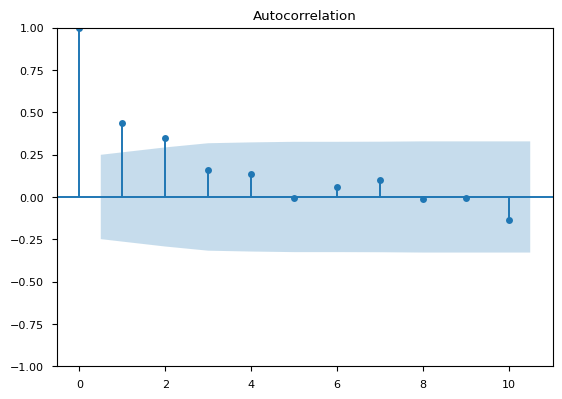

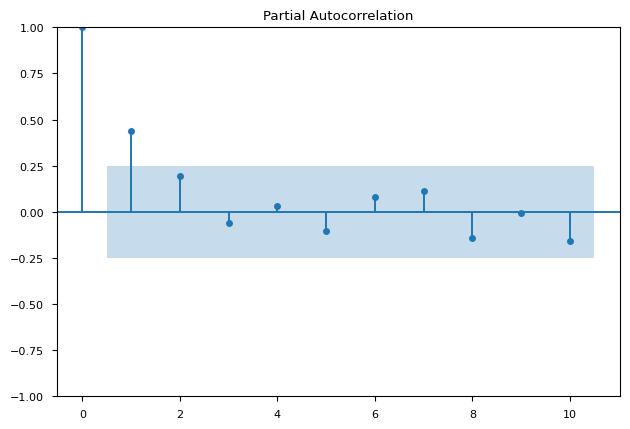

In [23]:
# Função de autocorrelação e autocorrelação parcial brasileira
plt.style.use('seaborn-paper')
brasil_acf = sgt.plot_acf(brazil, lags = 10)
brasil_pacf = sgt.plot_pacf(brazil, lags = 10)
plt.tight_layout()
plt.show()

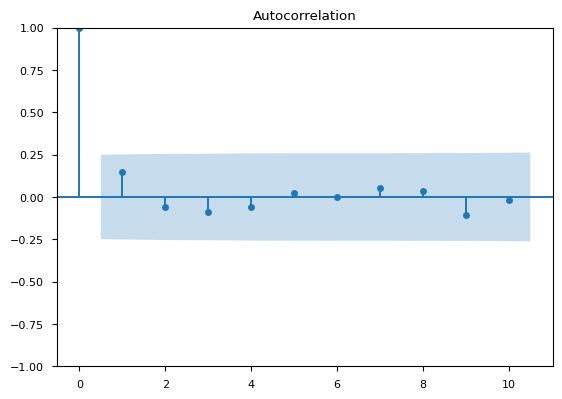

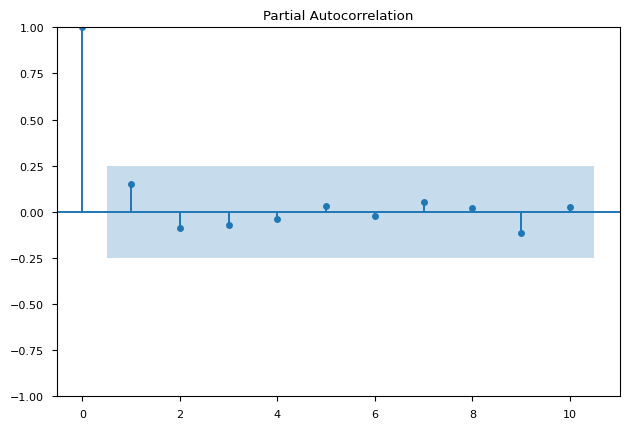

In [24]:
# Função de autocorrelação e autocorrelação parcial estadunidense
plt.style.use('seaborn-paper')
usa_acf = sgt.plot_acf(usa, lags = 10)
usa_pacf = sgt.plot_pacf(usa, lags = 10)
plt.tight_layout()
plt.show()

In [25]:
# Teste de estacionariedade Augmented Dickey Fuller.
print('Brazil',adfuller(brazil)[1])
print('United States',adfuller(usa)[1])

Brazil 4.393069480434134e-05
United States 5.830169417056893e-09


In [26]:
# Teste de estacionariedade Kwiatkowski-Phillips-Schmidt-Shin.
print('Brazil',kpss(brazil)[1])
print('United States',kpss(usa)[1])

Brazil 0.1
United States 0.0691124557480918


/tmp/ipykernel_20/34171176.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('Brazil',kpss(brazil)[1])


## Inferência de Séries Temporais (Variação PIB $per$ $capita$ Brazil)

In [27]:
# Train Test Split (70% 30%)
print('Total',len(brazil))
print('Treino',round(len(brazil) * 0.7,0))
print('Teste',round(len(brazil) * 0.3, 0))

Total 62
Treino 43.0
Teste 19.0


In [28]:
# Verificando Tamanho Train Test Split (70% 30%)
teste = brazil['2004-01-01':]
treino = brazil[:'2003-01-01']
print('Treno', len(treino))
print('Teste', len(teste))

Treno 43
Teste 19


### Modelo ARMA(1,1)

In [29]:
# Iniciando procesoo ARMA(1,1)
ARMA = sm.tsa.ARIMA(treino, order=(1,1,0))
resultado = ARMA.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [30]:
# Resultado do processo.
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Brazil   No. Observations:                   43
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -114.476
Date:                Thu, 28 Sep 2023   AIC                            232.952
Time:                        14:20:23   BIC                            236.427
Sample:                    01-01-1961   HQIC                           234.226
                         - 01-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4067      0.166     -2.456      0.014      -0.731      -0.082
sigma2        13.5864      2.435      5.580      0.000       8.815      18.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.77
Prob(Q):                              0.99   Prob(JB):                         0.06
Heteroskedasticity (H):               0.76   Skew:                            -0.74
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

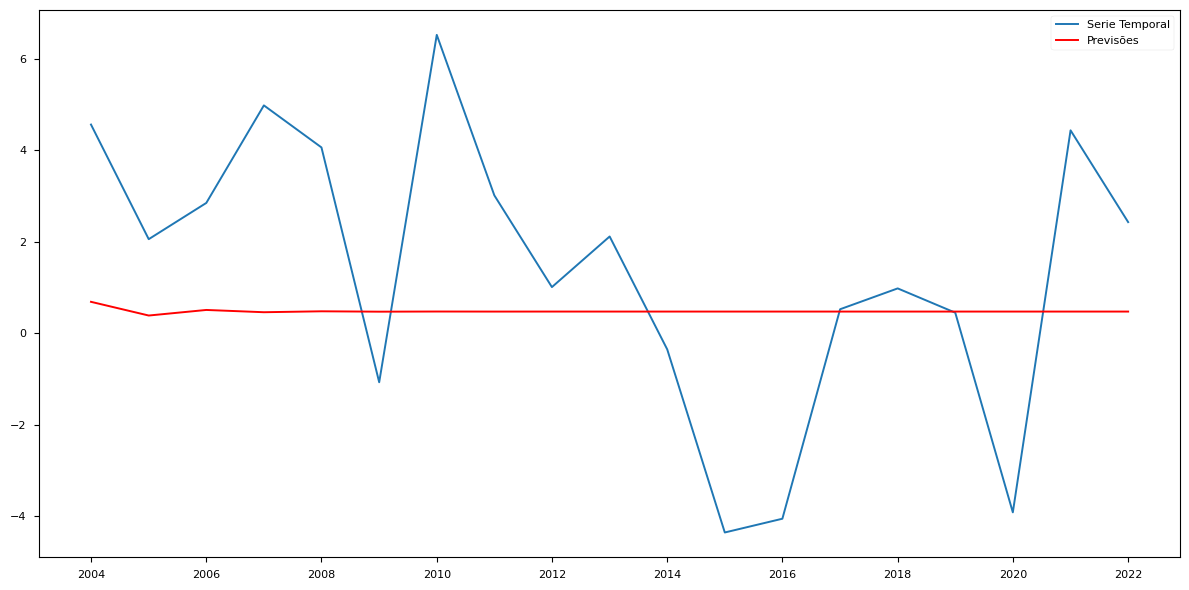

In [31]:
# Verificando previsões do modelo.
inferencia = resultado.predict(start=len(treino), end=len(treino) + len(teste) - 1, dynamic=False)

# Análise gráfica dos resultados.
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-paper')
plt.plot(teste, label='Serie Temporal')
plt.plot(inferencia, label='Previsões', color='red')
plt.legend()
plt.tight_layout()
plt.show()

### Modelo GARCH(1,1)

In [32]:
# Iniciando procesoo GARCH(1,1)
GARCH = arch_model(teste, vol='Garch', mean='Zero', p=1, q=1)
resultados = GARCH.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 61.232643057232636
Iteration:      2,   Func. Count:     11,   Neg. LLF: 49.78399951141585
Iteration:      3,   Func. Count:     15,   Neg. LLF: 49.78368547083869
Iteration:      4,   Func. Count:     19,   Neg. LLF: 49.783173497043414
Iteration:      5,   Func. Count:     23,   Neg. LLF: 49.7810454149641
Iteration:      6,   Func. Count:     27,   Neg. LLF: 49.77647465387278
Iteration:      7,   Func. Count:     31,   Neg. LLF: 49.76902393712607
Iteration:      8,   Func. Count:     35,   Neg. LLF: 49.71623429295095
Iteration:      9,   Func. Count:     39,   Neg. LLF: 49.7028044520101
Iteration:     10,   Func. Count:     43,   Neg. LLF: 49.69984101285732
Iteration:     11,   Func. Count:     47,   Neg. LLF: 49.69983443989618
Iteration:     12,   Func. Count:     50,   Neg. LLF: 49.69983443993339
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.69983443989618
            Iterations: 12
 

In [33]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Brazil   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.053
Vol Model:                      GARCH   Log-Likelihood:               -49.6998
Distribution:                  Normal   AIC:                           105.400
Method:            Maximum Likelihood   BIC:                           108.233
                                        No. Observations:                   19
Date:                Thu, Sep 28 2023   Df Residuals:                       19
Time:                        14:20:23   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      1.1087e-07      2.527  4.387e-08      1.000 [ -4.953,  4.953]
alpha[1]       0.0000  7.739e-02      0.000      1.000 [ -0.152,  0.152]
beta[1]        0.9844      0.294      3.347  8.167e-04 [  0.408,  1.561]
========================================================================

Covariance estimator: robust
"""

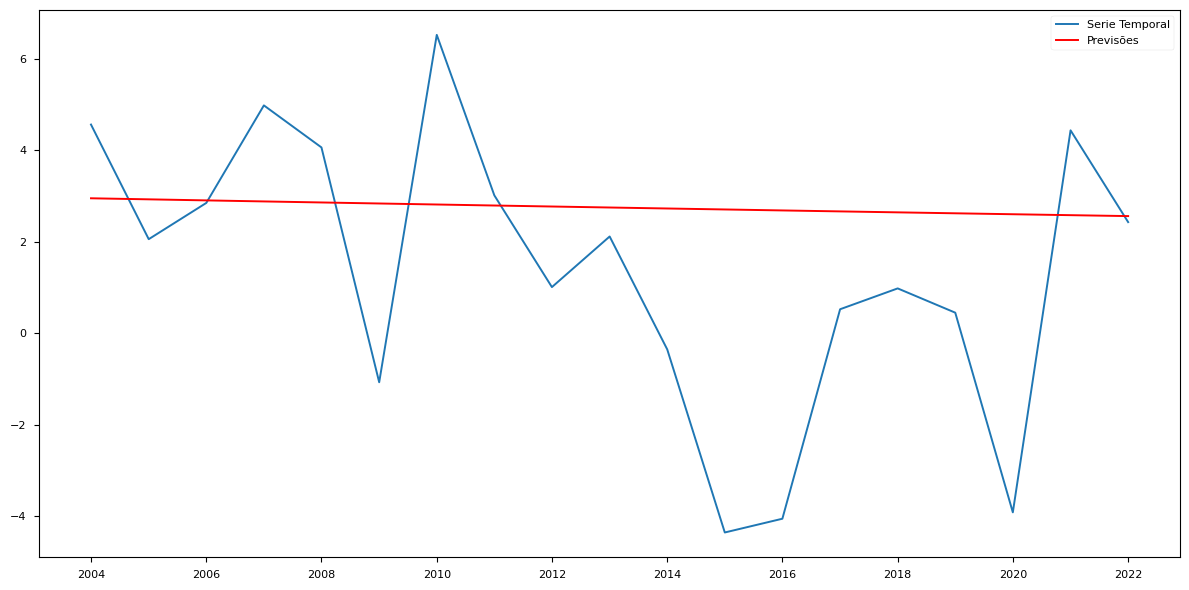

In [34]:
# Verificando previsões do modelo.
inferencia = resultados.forecast(horizon=len(teste))
var = pd.DataFrame(np.sqrt(inferencia.variance.values)[0], index=teste.index).rename(columns={0:'Previsão'})

# Análise gráfica dos resultados.
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-paper')
plt.plot(teste, label='Serie Temporal')
plt.plot(var, label='Previsões', color='red')
plt.legend()
plt.tight_layout()
plt.show()